## Oversight:
---
### Polynomials with one variable
1) Heart function: Gradient Descent
2) Polynomial of degree 3: Newton Raphson, Newton Method
3) Conway polynomial (order 71, because I sacrificed my life to find out the truth!!): Newton Raphson
4) Converging odd improper integral function degree 4: Newton Method

### Polynomials with two variables
5) polynomial order 4: Gradient Descent, Quasi Newton: Symmetric Rank 1 and BFGS with and without Line Search

### Lets get serious
6) 10 variables: Gradient Descent
7) 20 variables: Gradient Descent
8) 19 variables: Logistic loss as löss function, Gradient Descent and Line Search
9) 15 variables: Conjugate Gradient

# 1) Heart Function
---

Text(0.5, 1.0, 'heart function')

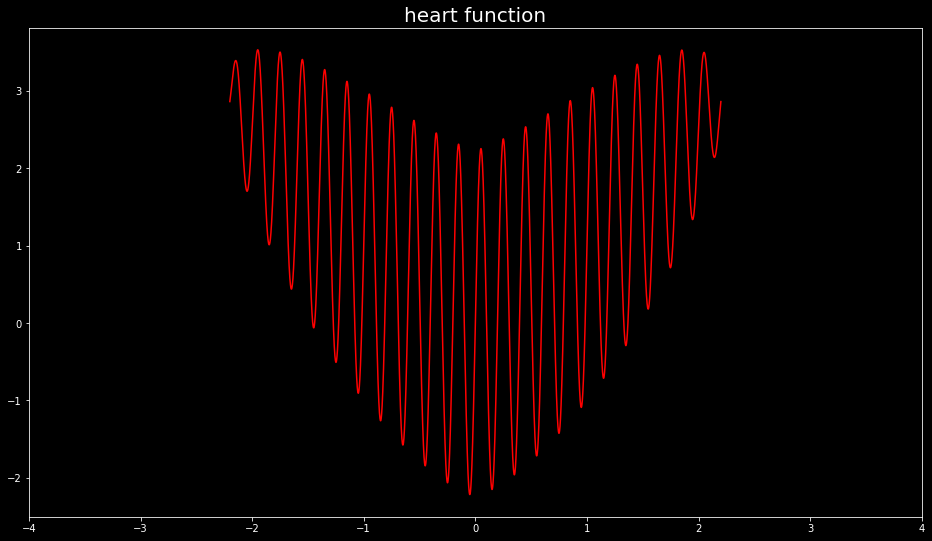

In [219]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2.2, 2.2, 10000)
# polynomial degree = 4/3 with sin
def f(x):
    y = np.cbrt(x**4) + np.sqrt(5 - x**2) * np.sin(10 * np.pi * x)
    return y

def f_prime(x):
    y = 4/3 * np.cbrt(x) + (-x/np.sqrt(5-np.power(x,2))*(np.sin(10*np.pi*x))) + (np.sqrt(5-x**2))*(10*np.pi*np.cos(10*np.pi*x))
    return y
    
plt.style.use("dark_background")
plt.figure(figsize=(16,9))
plt.plot(x, f(x), color="red")
plt.xlim([-4, 4])
plt.title("heart function", size=20)

### Gradient Descent for finding minima
---


In [220]:
def gradient_descent(x0, objective_function, f_prime, learning_rate=1e-4,maxiter=100, eps = 1e-3):
    x = x0
    iterations = 0

    for i in range(maxiter):
        iterations = i + 1
        xnew = x - learning_rate * f_prime(x)
        # working with positive loss for loss evaluation
        solution_eval = -f_prime(xnew)
        if i % 10 == 0: print('Loss is %s at iteration %i' % ((solution_eval), i))
        if solution_eval < eps:
            print(f"converged at iteration:{iterations} with a loss of {solution_eval}")
            return xnew
        
        x = xnew
    return x

Loss is 46.036550284527124 at iteration 0
Loss is 36.38581206387745 at iteration 10
Loss is 3.6059845631273646 at iteration 20
Loss is 0.32480548120067465 at iteration 30
Loss is 0.029220945340724613 at iteration 40
Loss is 0.0026287280309886807 at iteration 50
converged at iteration:56 with a loss of 0.0007884435946143853
x_star 0.5493706758835428


Text(0.5, 1.0, 'Local Minima of heart function')

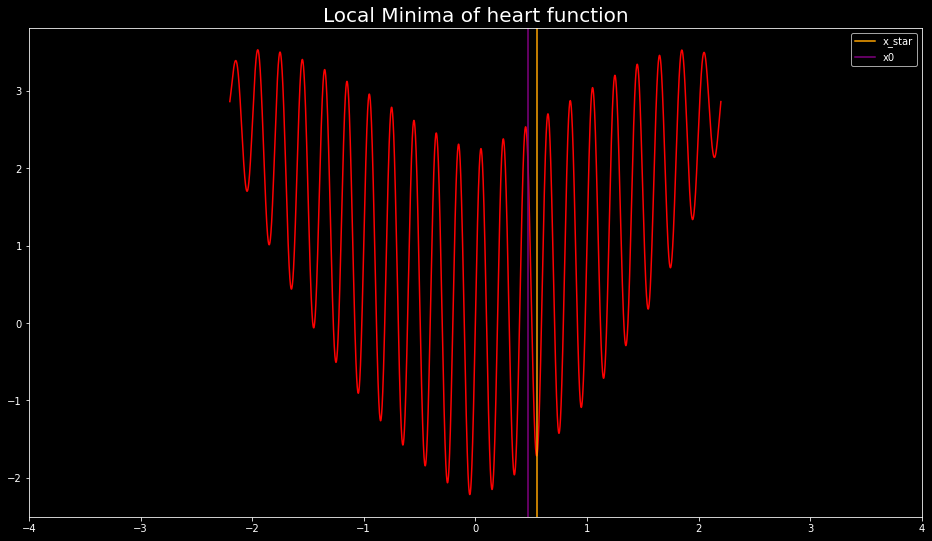

In [221]:
x0 = 0.47
x_star = gradient_descent(x0, f, f_prime)
print("x_star",x_star)
plt.figure(figsize=(16,9))
plt.plot(x, f(x), color="red")
plt.xlim([-4, 4])
plt.axvline(x=x_star, color="orange", label="x_star")
plt.axvline(x=x0, color="purple", label="x0")
plt.legend()
plt.title("Local Minima of heart function", size=20)

#### Observations:
---
+ if we set the learning rate to be 1e-3 local mimima is slightly passed and the loss would be negative after first iteration resulting in fullfilling the if condition at iteration 1 
+ decisive: learning rate should be 1e-4
+ really curious if there will ever exist an algorithm of always finding global minimum

# 2) Polynomial Order 3
---
$$
f(x) = x^3 - 6x^2 + 4x + 2 
$$

Text(0.5, 1.0, 'range between: -100,100')

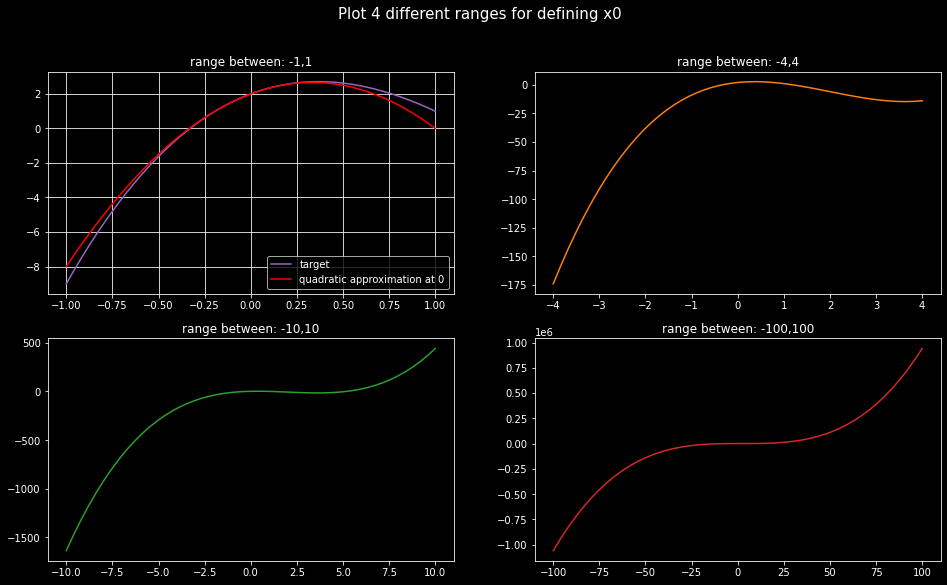

In [222]:
def f(x):
    return x**3 - 6*x**2 + 4*x + 2

def fprime(x):
    return 3*x**2-12*x+4

def fsecond(x):
    return 6*x - 12

# taylor polynomial degree 2
def quadratic_approx(x, x0, f, fprime, fsecond):
    return f(x0) + fprime(x0) * (x - x0) + 0.5 * fsecond(x0) * (x - x0)**2

x1 = np.linspace(-1, 1)
x2 = np.linspace(-4, 4)
x3 = np.linspace(-10, 10)
x4 = np.linspace(-100, 100)

fig, ax = plt.subplots(2,2,figsize=(16,9))
fig.suptitle("Plot 4 different ranges for defining x0", size=15)

ax[0,0].plot(x1, f(x1), 'tab:purple', label="target")
x0 = 0
ax[0,0].plot(x1, quadratic_approx(x1, x0, f, fprime, fsecond), color='red', label=f'quadratic approximation at {x0}')
ax[0,0].set_title("range between: -1,1")
ax[0,0].legend()
ax[0,0].grid()

ax[0,1].plot(x2, f(x2), 'tab:orange')
ax[0,1].set_title("range between: -4,4")

ax[1,0].plot(x3, f(x3), 'tab:green')
ax[1,0].set_title("range between: -10,10")


ax[1,1].plot(x4, f(x4), 'tab:red')
ax[1,1].set_title("range between: -100,100")

### Newton Raphson for finding roots
---
+ newton raphson requires a good first guess for converging to root 

In [223]:
def newton_raphson(x0, f, fprime, maxiter=5, eps=1e-20):
    x=x0
    iterations = 0
    for i in range(maxiter):
        iterations = i + 1
        xnew = x - (f(x)/fprime(x))
        if (f(xnew)) == 0.0:
            print(f"perfectly converged at iteration:{iterations}")
            return xnew
        loss = np.abs(f(xnew))
        if loss < eps:
            print(f"converged at iteration:{iterations} with f(x) being {f(xnew)}")
            return xnew
        x = xnew
    return x

perfectly converged at iteration:5
x_star: 1.181441948273326 f(x_star)= 0.0000000000000000

x_star: -0.32887218197113205 f(x_star)= -0.0000000000004339

x_star: 5.147630959289927 f(x_star)= 0.0043599297918036


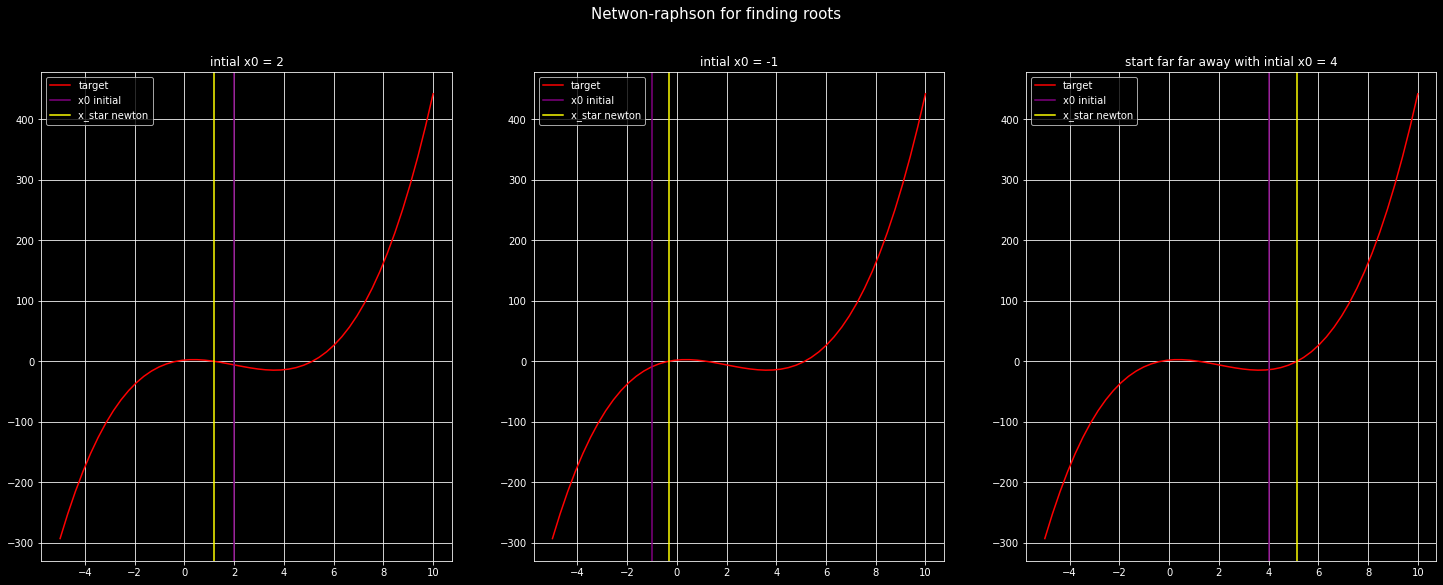

In [224]:
x0 = 2
x_star = newton_raphson(x0, f, fprime)
print("x_star:", x_star, "f(x_star)= {:.16f}".format(f(x_star)))
print()

fig, ax = plt.subplots(1,3, figsize=(25,9))
fig.suptitle("Netwon-raphson for finding roots", fontsize=15)

x = np.linspace(-5, 10)

ax[0].plot(x, f(x), label='target', color="red")
ax[0].set_title(f"intial x0 = {x0}")
ax[0].axvline(x = x0, color='purple', label='x0 initial')
ax[0].axvline(x = x_star, color='yellow', label='x_star newton')
ax[0].grid()
ax[0].legend()

x0 = -1
x_star = newton_raphson(x0, f, fprime)
print("x_star:", x_star, "f(x_star)= {:.16f}".format(f(x_star)))
print()

ax[1].plot(x, f(x), label='target', color="red")
ax[1].set_title(f"intial x0 = {x0}")
ax[1].axvline(x = x0, color='purple', label='x0 initial')
ax[1].axvline(x = x_star, color='yellow', label='x_star newton')
ax[1].grid()
ax[1].legend()

x0 = 4
x_star = newton_raphson(x0, f, fprime)
print("x_star:", x_star, "f(x_star)= {:.16f}".format(f(x_star)))

ax[2].plot(x, f(x), label='target', color="red")
ax[2].set_title(f"start far far away with intial x0 = {x0}")
ax[2].axvline(x = x0, color='purple', label='x0 initial')
ax[2].axvline(x = x_star, color='yellow', label='x_star newton')
ax[2].grid()
ax[2].legend()

### Observations:
---
+ very sensitive with choosing the initial value: for example choosing x0 = 4 and more than 1 iteration results in diverging x* 
+ we choose a grid so we can check with intersection of horiontal at 0 
+ we were able of finding all three roots!

## Newton Method for minima and maxima
---
+ difference to netwon raphson is division between first and second derivative
+ in fact we have only one local mimina and max each 

In [225]:
def newton(x0, fprime, fsecond, maxiter=100, eps=0.0001):
    x=x0
    iterations = 0
    for i in range(maxiter):
        iterations = i + 1
        xnew = x - (fprime(x)/fsecond(x))
        # work with positive slope
        loss = np.abs(fprime(x))
        if i % 10 == 0: print('Loss is %s at iteration %i' % ((loss), i))
        if loss < eps:
            print('converged at iteration', iterations,"loss:", loss)
            return xnew
            break
        x = xnew
    return x

Loss is 19 at iteration 0
converged at iteration 5 loss: 1.0560741880993874e-07
loc max: 0.36700683814454793 f'(x)= 0.0 

Loss is 40 at iteration 0
converged at iteration 5 loss: 3.0235378929432954e-05
loc max: 3.632993161858368 f'(x)= 2.8563817977556027e-11


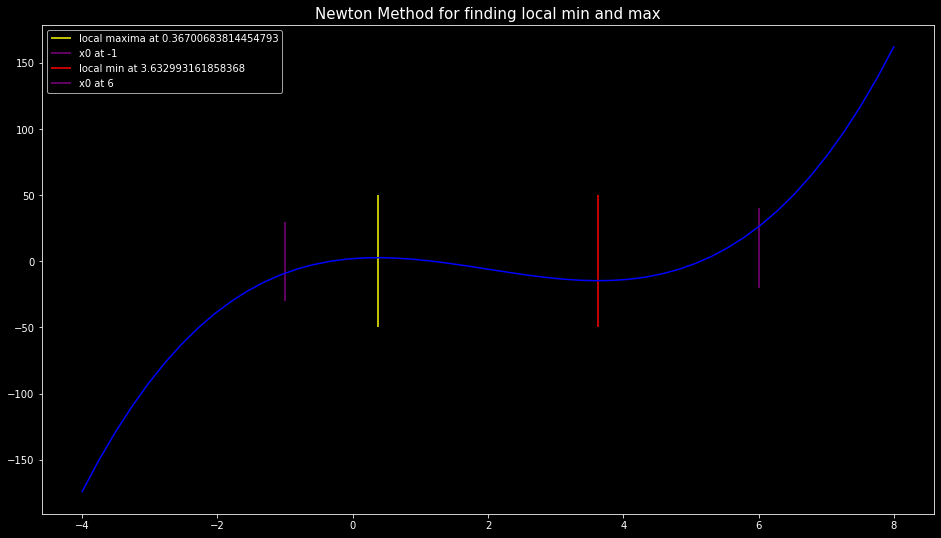

In [226]:
x=np.linspace(-4,8)
plt.figure(figsize=(16,9))
plt.title("Newton Method for finding local min and max", fontsize=15)
plt.plot(x, f(x), color="blue")

x0 = -1
loc_max = newton(x0, fprime, fsecond)
print("loc max:", loc_max,"f'(x)=", fprime(loc_max),"\n")
plt.vlines(x=loc_max, ymin=-50, ymax=50, color="yellow", label=f"local maxima at {loc_max}")
plt.vlines(x=x0, ymin=-30, ymax=30, color="purple", label=f"x0 at {x0}")

x0 = 6
loc_min = newton(x0, fprime, fsecond)
print("loc max:", loc_min,"f'(x)=", fprime(loc_min))
plt.vlines(x=loc_min, ymin=-50, ymax=50, color="red", label=f"local min at {loc_min}")
plt.vlines(x=x0, ymin=-20, ymax=40, color="purple", label=f"x0 at {x0}")
plt.legend()

### Observations:
---
+ Note that our loss function is evaluated by calculating the slope and we decided to work with a positive slope, so we have to choose a point where its slope is also positive (choosing a point where the function is monotone increasing)

# 3) Conway Polynomial of order 71
---
+ We have two approaches for obtaining the real root of this polynomial: Conway Constant derivation and Newton-Raphson Method
+ We try Newton Method and see if we can find the real root
+ furthermore we try gradient descent and Newton method to obtain local minimas

In [227]:
def f(x):
    y = x**71 -               x**69 -    2*x**68 - x**67 +   2*x**66 +  2*x**65 +  x**64 -   x**63 \
      - x**62 -    x**61 -    x**60 -    x**59 +   2*x**58 + 5*x**57 +  3*x**56 -  2*x**55 - 10*x**54 \
      - 3*x**53 -  2*x**52 +  6*x**51 +  6*x**50 + x**49 +   9*x**48 -  3*x**47 -  7*x**46 - 8*x**45 \
      - 8*x**44 +  10*x**43 + 6*x**42 +  8*x**41 - 5*x**40 - 12*x**39 + 7*x**38 -  7*x**37 + 7*x**36 \
      + x**35 -    3*x**34 +  10*x**33 + x**32 -   6*x**31 - 2*x**30 -  10*x**29 - 3*x**28 + 2*x**27 \
      + 9*x**26 -  3*x**25 +  14*x**24 - 8*x**23 -           7*x**21 +  9*x**20 +  3*x**19 - 4*x**18 \
      - 10*x**17 - 7*x**16 +  12*x**15 + 7*x**14 + 2*x**13 - 12*x**12 -  4*x**11 -  2*x**10 + 5*x**9 \
                 + x**7 -     7*x**6 +   7*x**5 -   4*x**4 + 12*x**3 -  6*x**2 +   3*x -     6
    return y

def f_prime(x):
    y = 71*x**70 -              69*x**68 -  136*x**67 - 67*x**66 +  132*x**65 + 130*x**64 + 64*x**63 -  63*x**62 \
      - 62*x**61 -   61*x**60 - 60*x**59 -  59*x**58 +  116*x**57 + 285*x**56 + 168*x**55 - 110*x**54 - 540*x**53 \
      - 159*x**52 - 104*x**51 + 306*x**50 + 300*x**49 + 49*x**48 +  432*x**47 - 141*x**46 - 332*x**45 - 360*x**44 \
      - 352*x**43 + 430*x**42 + 252*x**41 + 328*x**40 - 200*x**39 - 468*x**38 + 266*x**37 - 259*x**36 + 252*x**35 \
      + 35*x**34 -  102*x**33 + 330*x**32 + 32*x**31 -  186*x**30 - 60*x**29 -  290*x**28 - 84*x**27 +  54*x**26 \
      + 234*x**25 -  75*x**24 + 336*x**23 - 184*x**22 -             147*x**20 + 180*x**19 + 57*x**18 -  72*x**17 \
      - 170*x**16 - 112*x**15 + 180*x**14 + 98*x**13 +  26*x**12 -  144*x**11 - 44*x**10 -  20*x**9 +   45*x**8 \
                 +  7*x**6 -    42*x**5 +   35*x**4 -   16*x**3 +   36*x**2 -   12*x**1 +   3
    return y

# official conway constant: https://oeis.org/A014715
conway_constant = 1.303577269034296391257099112152551890730702504659404875754861390628550
f(conway_constant)

2.7956117421013005e-08

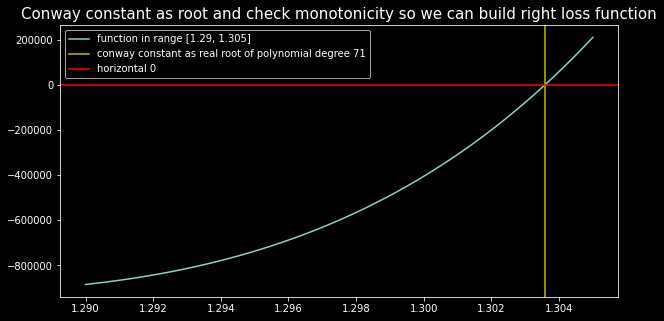

In [228]:
x = np.linspace(1.29,1.305,1000)
plt.figure(figsize=(10,5))
plt.plot(x, f(x), label="function in range [1.29, 1.305]")
plt.axvline(x = conway_constant, color = 'y', label = 'conway constant as real root of polynomial degree 71')
plt.axhline(y = 0, color = 'r', label = 'horizontal 0')
plt.title("Conway constant as root and check monotonicity so we can build right loss function", size=15)
plt.legend()

Since our newton raphson 

### Newton Raphson for finding root of Conway Polynomial
---

In [229]:
def newton_raphson(x0, f, fprime, maxiter=10000, eps=1e-6):
    x=x0
    iterations = 0
    for i in range(maxiter):
        iterations = i + 1
        xnew = x - (f(x)/fprime(x))
        if (f(xnew)) == 0.0:
            print(f"perfectly converged at iteration:{iterations}")
            return xnew
        loss = np.abs(f(xnew))
        if loss < eps:
            print(f"converged at iteration:{iterations} with f(x) being {f(xnew)}")
            return xnew
        x = xnew
    return x

converged at iteration:480 with f(x) being -1.0772943603853946e-07
x_star: 1.3035772690342955 f(x_star)= -0.0000001077294360


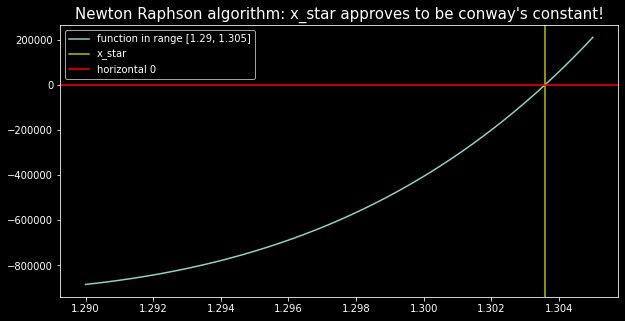

In [230]:
x0 = 1000
x_star = newton_raphson(x0, f, f_prime)

print("x_star:", x_star, "f(x_star)= {:.16f}".format(f(x_star)))

plt.figure(figsize=(10,5))
x = np.linspace(1.29,1.305,1000)
plt.plot(x, f(x), label="function in range [1.29, 1.305]")
plt.axvline(x = x_star, color = 'y', label = 'x_star')
plt.axhline(y = 0, color = 'r', label = 'horizontal 0')
plt.title("Newton Raphson algorithm: x_star approves to be conway's constant!", size=15)
plt.legend()

#### Observation:
---
+ In order to achieve convergence the argument of epsilon was decisive
+ x0 can be chosen from [1.3, inf) and mostly it attains conway's constant

# 4) Golden Helix Function
---
$$
f(x) = x * e^{-x^4}
$$

Text(0.5, 1.0, 'Converging odd improper integral function')

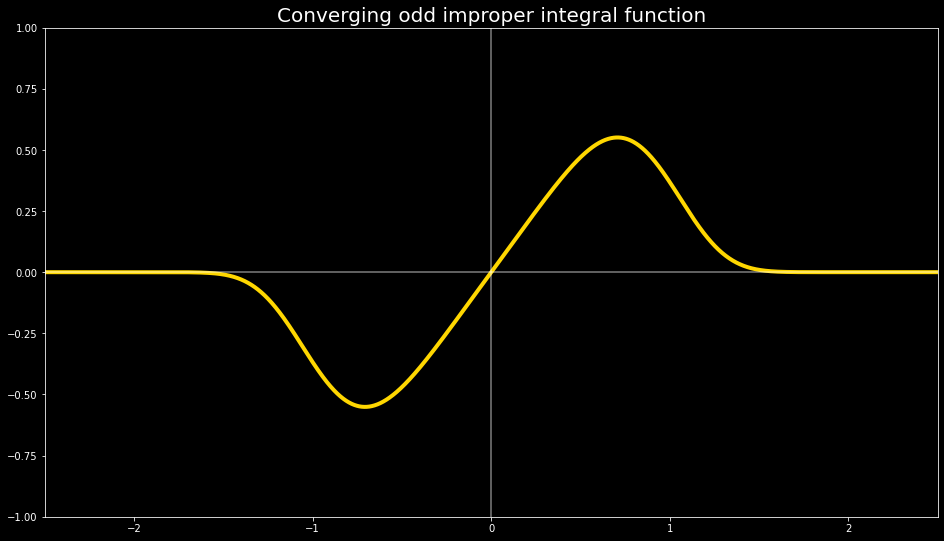

In [231]:
# polynomial degree 4
def f(x):
    y = x * np.exp(-np.power(x, 4))
    return y

def f_prime(x):
    y = np.exp(-x**4) * (1 - 4 * x**4)
    return y

def f_second(x):
    y = np.exp(-x**4) * (16*x**7 - 20*x**3)
    return y

x = np.linspace(-10, 10, 10000)
plt.figure(figsize=(16,9))
plt.plot(x, f(x), color="gold", linewidth=4)
plt.xlim([-2.5, 2.5])
plt.ylim([-1,1])
plt.axhline(y=0, alpha=0.5)
plt.axvline(x=0, alpha=0.5)
plt.title("Converging odd improper integral function", size=20)

### Newton Method for Local Min and Max
---

In [232]:
def newton(x0, fprime, fsecond, maxiter=100, eps=0.0001):
    x = x0
    iterations = 0
    for i in range(maxiter):
        iterations = i + 1
        xnew = x - (fprime(x) / fsecond(x))
        # work with positive slope
        loss = np.abs(fprime(x))
        if i % 10 == 0: print('Loss is %s at iteration %i' % ((loss), i))
        if loss < eps:
            print('converged at iteration', iterations,"loss:", loss)
            return xnew
            break
        x = xnew
    return x

Loss is 0.8023881419665523 at iteration 0
converged at iteration 6 loss: 3.2109596105708547e-09
x_star 0.7071067811865476 f'(x_star) -1.729285121923951e-16 

Loss is 0.7045597971101069 at iteration 0
converged at iteration 4 loss: 5.990429728788563e-06
x_star -0.7071067811878549 f'(x_star) -5.7595570270692634e-12 



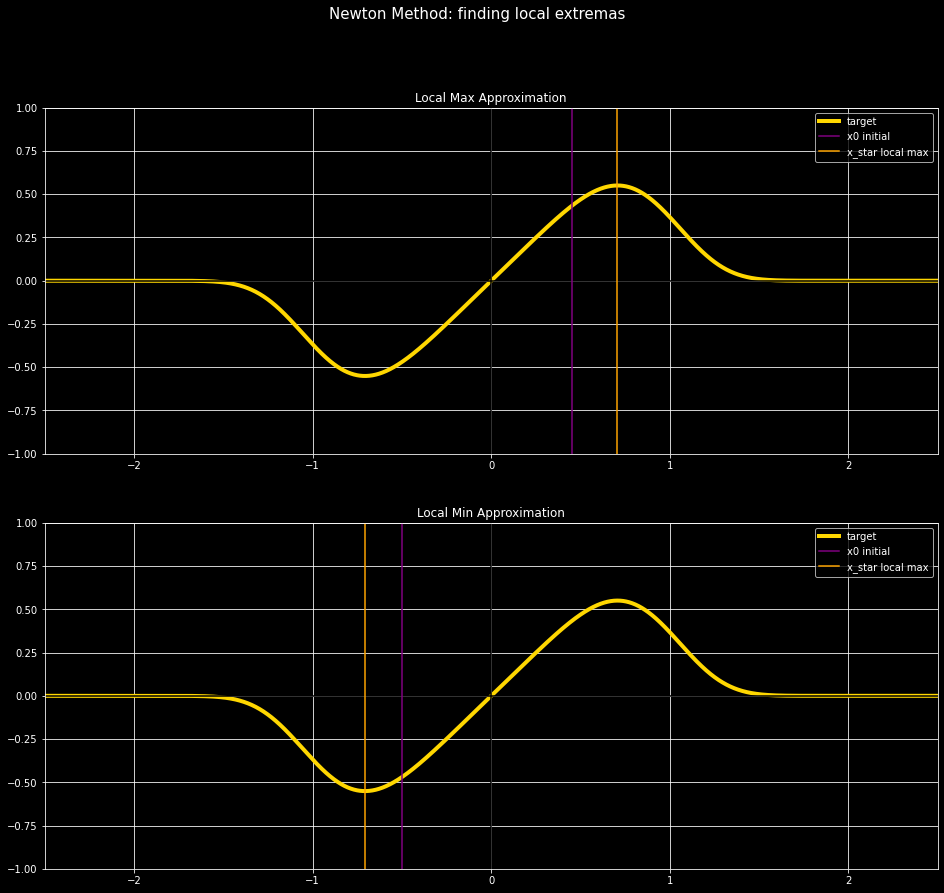

In [233]:
x0 = 0.45
x_star = newton(x0, f_prime, f_second)
print("x_star", x_star, "f'(x_star)", f_prime(x_star),"\n")

fig, ax = plt.subplots(2, figsize=(16,14))
fig.suptitle("Newton Method: finding local extremas", fontsize=15)

ax[0].plot(x, f(x), label='target', color="gold", linewidth=4)
ax[0].set_ylim([-1,1])
ax[0].set_xlim([-2.5,2.5])
ax[0].axhline(y=0, color='k')
ax[0].axvline(x=0, color='k')
ax[0].axvline(x = x0, color='purple', label='x0 initial')
ax[0].axvline(x = x_star, color='orange', label='x_star local max')
ax[0].set_title("Local Max Approximation")
ax[0].legend()
ax[0].grid()

x0 = -0.5
x_star = newton(x0, f_prime, f_second)
print("x_star", x_star, "f'(x_star)", f_prime(x_star),"\n")

ax[1].plot(x, f(x), label='target', color="gold", linewidth=4)
ax[1].set_ylim([-1,1])
ax[1].set_xlim([-2.5,2.5])
ax[1].axhline(y=0, color='k')
ax[1].axvline(x=0, color='k')
ax[1].axvline(x = x0, color='purple', label='x0 initial')
ax[1].axvline(x = x_star, color='orange', label='x_star local max')
ax[1].set_title("Local Min Approximation")
ax[1].legend()
ax[1].grid()

#### Newton Observation:
---
+ interestingly for finding local maxima x0 = 0.5 works best and for local minima x0 = -0.5 or -0.6 works best
+ otherwise for local maxima setting x0 € [0.1 ,0.4] x* gets far away in positive direction passing local max
+ for local minima x0 € [-0.4, -0.1] x* gets far away in negative direction passing local min

+ Newtons Method needs a good first guess to be successful

# 5) Polynomial 2 Variables order 4
---

$$
f(x) = x_1^2 + x_2^4 + x_1 x_2 
$$

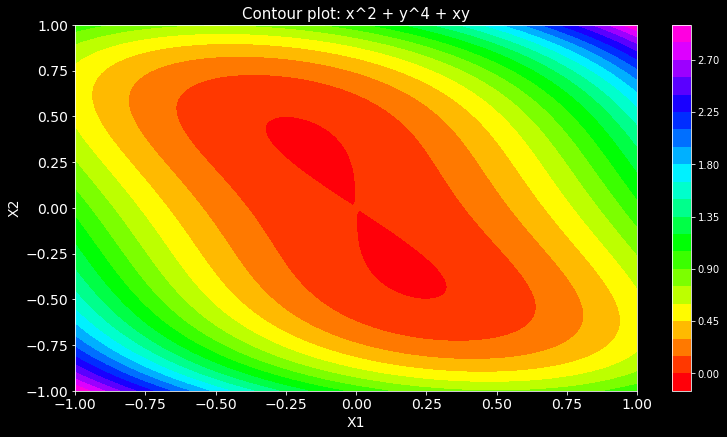

In [234]:
def f(x):
    x1 = x[0]
    x2 = x[1]
    val = x1**2 + x2**4 + 1*x1*x2
    return val

def grad(x):
    x1 = x[0]
    x2 = x[1]
    val = np.array([2 * x1 + 1 * x2, 
                    4 * x2**3 + 1 * x1])
    return val

def hess(x):
    x1 = x[0]
    x2 = x[1]
    val = np.array([[2, 1], [1, 12 * x2]])
    return val

def plot_2d_function(f, N=100, x1_range=[-1, 1], x2_range=[-1, 1]):
    box = 0.6
    x1 = np.linspace(x1_range[0], x1_range[1], N)
    x2 = np.linspace(x2_range[0], x2_range[1], N)

    x1_grid, x2_grid = np.meshgrid(x1, x2)
    f_grid = f([x1_grid, x2_grid])

    plt.figure(figsize=(11, 6))
    plt.contourf(x1, x2, f_grid, levels=25,cmap="gist_rainbow")
    plt.colorbar()

    plt.xlabel('X1', size=14)
    plt.xticks(size=14)

    plt.ylabel('X2', size=14)
    plt.yticks(size=14)

    plt.xlim(x1_range[0], x1_range[1])
    plt.ylim(x2_range[0], x2_range[1])

def add_opt_path(x_iters, color, color2, label="Gradient descent", scatter=1):
    if scatter:
        plt.scatter(x_iters[:, 0], x_iters[:, 1], color=color, linewidth=0.1)
        
    plt.plot(x_iters[:, 0], x_iters[:, 1], color=color2, linewidth=1, label=label)    

plot_2d_function(f, N=100, x1_range=[-1., 1.], x2_range=[-1., 1.])
plt.tight_layout()
plt.title("Contour plot: x^2 + y^4 + xy", fontsize=15)
plt.show()

### Gradient Descent for 2 variables
---

In [235]:
def gradient_descent(f, grad, x_0, alpha=0.1, verbose=0, steepest=0, n_iters=100):
    x_curr = x_0
    # Задаем список x на каждой итерации
    x_iters = [x_curr]
    
    for i in range(1, n_iters):
        g = grad(x_curr)
        x_new = x_curr - alpha * g
        x_iters.append(x_new)
        x_curr = x_new
    
    return np.array(x_iters)

#### Line Seach Algorithm
---

In [236]:
from scipy.optimize import minimize

def alpha_search(f, x_curr, p):
    fun = lambda alpha: f(x_curr - alpha * p)
    res = minimize(fun, [0], method='Nelder-Mead')
    return res.x[0]

## Quasi Newton variations:

### Symmetric rank-one initialization
---

In [237]:
def sr1(f, grad, x_0, line_search, alpha, n_iters):
    B_curr = np.identity(2)
    H_curr = np.linalg.inv(B_curr)
    x_curr = x_0
    x_new  = x_curr - alpha * grad(x_curr)
    s_curr = x_new - x_curr
    y_curr = grad(x_new) - grad(x_curr)
    
    x_iters_sr1 = [x_0]
    for i in range(1, n_iters):
        g = grad(x_curr)
        p = H_curr.dot(g)
        
        if line_search: alpha = alpha_search(f, x_curr, p)
        x_new = x_curr - alpha * p
        
        s_new = x_new - x_curr
        y_new = grad(x_new) - grad(x_curr)
        s_curr = s_new
        y_curr = y_new
        
        b = y_curr - B_curr.dot(s_curr)
        B_new = B_curr + b.dot(b.T) / (b.T.dot(s_curr) + 10**-8)
        
        a = s_curr - H_curr.dot(y_curr)
        H_new = H_curr + a.dot(a.T) / (a.T.dot(y_curr) + 10**-8)
        
        r = 10**-8
        if s_curr.T.dot(b) > r * np.sqrt(s_curr.T.dot(s_curr) * b.T.dot(b)):
            H_curr = H_new
            B_curr = B_new
        x_iters_sr1.append(x_new)
        x_curr = x_new
        
    return np.array(x_iters_sr1)

### Broyden-Fletcher-Goldfarb-Shanno Algorithm
---

In [238]:
def bfgs(f, grad, x_0, line_search, alpha, n_iters):
    H_curr = np.identity(2)
    x_curr = x_0
    x_new  = x_curr - alpha * grad(x_curr)
    s_curr = x_new - x_curr
    y_curr = grad(x_new) - grad(x_curr)
    
    x_iters_bfgs = [x_0]
    
    for i in range(1, n_iters):
        g = grad(x_curr)
        p = H_curr.dot(g)
        
        if line_search: alpha = alpha_search(f, x_curr, p)
        x_new = x_curr - alpha * p
        
        # s u y
        s_new = x_new - x_curr
        y_new = grad(x_new) - grad(x_curr)
        s_curr = s_new
        y_curr = y_new
        
        # H
        pho = 1. / (y_curr.T.dot(s_curr) + 10**-8)
        a = np.identity(2) - pho * s_curr.dot(y_curr.T)
        b = np.identity(2) - pho * y_curr.dot(s_curr.T)
        H_new = a.dot( H_curr.dot(b) ) + pho * s_curr.dot(s_curr.T)
        H_curr = H_new
        
        x_iters_bfgs.append(x_new)
        x_curr = x_new
        
    return np.array(x_iters_bfgs)

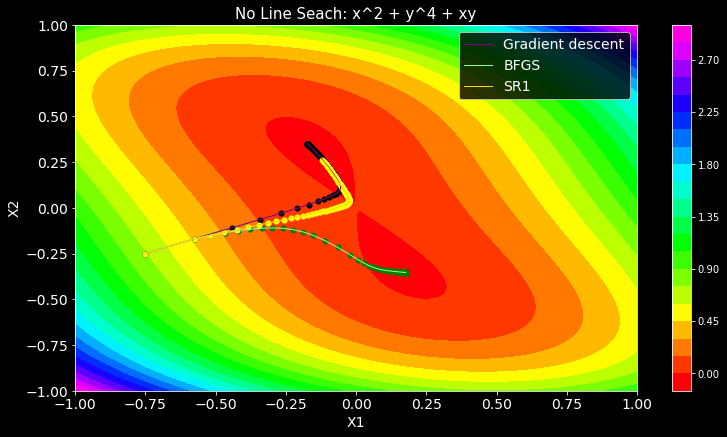

In [239]:
alpha = 0.1

x_0 = np.array([[-0.75], [-0.25]])

x_iters = gradient_descent(f, grad, x_0, alpha)
x_iters_sr1 = sr1(f, grad, x_0, line_search=False, alpha=0.1, n_iters=100)
x_iters_bfgs = bfgs(f, grad, x_0, line_search=False, alpha=0.1, n_iters=100)

plot_2d_function(f, N=100, x1_range=[-1., 1.], x2_range=[-1., 1.])
add_opt_path(x_iters, label="Gradient descent", color="black", color2="purple")
add_opt_path(x_iters_bfgs, label="BFGS", color="green", color2="palegreen")
add_opt_path(x_iters_sr1, label="SR1", color="yellow", color2="gold")

plt.legend(loc='best', fontsize=14)
plt.tight_layout()
plt.title("No Line Seach: x^2 + y^4 + xy", fontsize=15)
plt.show()

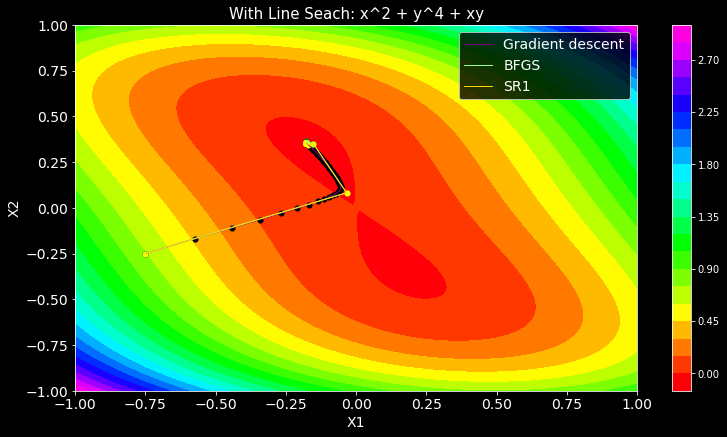

In [241]:
x_iters = gradient_descent(f, grad, x_0, alpha)
x_iters_sr1 = sr1(f, grad, x_0, line_search=True, alpha=0.1, n_iters=100)
x_iters_bfgs = bfgs(f, grad, x_0, line_search=True, alpha=0.1, n_iters=100)

plot_2d_function(f, N=100, x1_range=[-1., 1.], x2_range=[-1., 1.])
add_opt_path(x_iters, label="Gradient descent", color="black", color2="purple")
add_opt_path(x_iters_bfgs, label="BFGS", color="green", color2="palegreen")
add_opt_path(x_iters_sr1, label="SR1", color="yellow", color2="gold")

plt.legend(loc='best', fontsize=14)
plt.tight_layout()
plt.title("With Line Seach: x^2 + y^4 + xy", fontsize=15)
plt.show()

# Trust Region
---

In [242]:
import numpy as np
import numpy.linalg as ln
import scipy as sp
from math import sqrt

def dogleg_method(Hk, gk, Bk, trust_radius):
    pB = -np.dot(Hk, gk)
    norm_pB = sqrt(np.dot(pB, pB))

    if norm_pB <= trust_radius:
        return pB

    pU = - (np.dot(gk, gk) / np.dot(gk, np.dot(Bk, gk))) * gk
    dot_pU = np.dot(pU, pU)
    norm_pU = sqrt(dot_pU)

    if norm_pU >= trust_radius:
        return trust_radius * pU / norm_pU

    pB_pU = pB - pU
    dot_pB_pU = np.dot(pB_pU, pB_pU)
    dot_pU_pB_pU = np.dot(pU, pB_pU)
    fact = dot_pU_pB_pU ** 2 - dot_pB_pU * (dot_pU - trust_radius ** 2)
    tau = (-dot_pU_pB_pU + sqrt(fact)) / dot_pB_pU

    return pU + tau * pB_pU


def trust_region_dogleg(func, jac, hess, x0, initial_trust_radius=1.0,
                        max_trust_radius=100.0, eta=0.15, gtol=1e-4,
                        maxiter=100):
    xk = x0
    trust_radius = initial_trust_radius
    k = 0
    while True:

        gk = jac(xk)
        Bk = hess(xk)
        Hk = np.linalg.inv(Bk)

        pk = dogleg_method(Hk, gk, Bk, trust_radius)

        act_red = func(xk) - func(xk + pk)

        pred_red = -(np.dot(gk, pk) + 0.5 * np.dot(pk, np.dot(Bk, pk)))

        rhok = act_red / pred_red
        if pred_red == 0.0:
            rhok = 1e99
        else:
            rhok = act_red / pred_red

        norm_pk = sqrt(np.dot(pk, pk))

        if rhok < 0.25:
            trust_radius = 0.25 * norm_pk
        else:
            if rhok > 0.75 and norm_pk == trust_radius:
                trust_radius = min(2.0 * trust_radius, max_trust_radius)
            else:
                trust_radius = trust_radius

        if rhok > eta:
            xk = xk + pk
        else:
            xk = xk

        if ln.norm(gk) < gtol:
            break

        if k >= maxiter:
            break
        k = k + 1
    return xk

result = trust_region_dogleg(f, grad, hess, [-0.75, -0.25])
print("Result of trust region dogleg method: {}".format(result))
print("Value of function at a point: {}".format(f(result)))

Result of trust region dogleg method: [ 2.66838801e-10 -5.33677603e-10]
Value of function at a point: -7.120294592575491e-20


#### Observation:
---
+ We managed to find the minima!

# 6) Matrix 10x10
---

In [243]:
import numpy as np
import torch

def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

dim = 10
A = torch.rand(dim, dim, requires_grad=False) 
A = A @ torch.transpose(A, 0, 1)
b = torch.rand(dim, 1,  requires_grad=False) 

# random vector
x = torch.autograd.Variable(torch.rand(dim, 1), requires_grad=True) 
is_pos_def(A)

True

In [244]:
stop_loss = 1e-3
step_size = stop_loss / 3.0 # 0.0033333333333333335
print('Loss before: %s' % (torch.norm(torch.matmul(A, x) - b)))

for i in range(100000):
    Δ = torch.matmul(A, x) - b
    L = torch.norm(Δ, p=2)
    L.backward() # calculate gradient
    
    # x.grad.data = gradient of loss function
    x.data -= step_size * x.grad.data # step
    
    # set gradients of x vector to zero otherwise - accumulation happens
    x.grad.data.zero_()
    
    if i % 10000 == 0: print('Loss is %s at iteration %i' % (L, i))
        
    if abs(L) < stop_loss:
        print('It took %s iterations to achieve %s loss.' % (i, step_size))
        break
        
print('Loss after: %s' % (torch.norm(torch.matmul(A, x) - b)))

Loss before: tensor(38.1805, grad_fn=<CopyBackwards>)
Loss is tensor(38.1805, grad_fn=<NormBackward1>) at iteration 0
Loss is tensor(0.4957, grad_fn=<NormBackward1>) at iteration 10000
Loss is tensor(0.4786, grad_fn=<NormBackward1>) at iteration 20000
Loss is tensor(0.4734, grad_fn=<NormBackward1>) at iteration 30000
Loss is tensor(0.4719, grad_fn=<NormBackward1>) at iteration 40000
Loss is tensor(0.4714, grad_fn=<NormBackward1>) at iteration 50000
Loss is tensor(0.4712, grad_fn=<NormBackward1>) at iteration 60000
Loss is tensor(0.4712, grad_fn=<NormBackward1>) at iteration 70000
Loss is tensor(0.4711, grad_fn=<NormBackward1>) at iteration 80000
Loss is tensor(0.4711, grad_fn=<NormBackward1>) at iteration 90000
Loss after: tensor(0.4711, grad_fn=<CopyBackwards>)


In [245]:
import pandas as pd
data = {"true vector": b.cpu().numpy().flatten(), "optimized vector": (A @ x).cpu().detach().numpy().flatten()}
pd.DataFrame(data, columns=["true vector", "optimized vector"])

,true vector,optimized vector
0,0.004661,0.099789
1,0.251696,0.542969
2,0.951395,0.763283
3,0.604951,0.452363
4,0.525895,0.691804
5,0.562084,0.607024
6,0.764883,0.595020
7,0.325540,0.272409
8,0.404279,0.331826
9,0.729223,0.783317


# 7) Matrix: 20x20
---

In [246]:
import sklearn.datasets

dim = 20
# construct positive def matrix
A = sklearn.datasets.make_spd_matrix(dim, random_state=42)
b = np.random.randint(low=0, high=10, size=(dim,1))
x = np.random.uniform(low=0, high=10, size=(dim,1))
stop_loss = 1e-2
step_size = stop_loss / 3.0 # 0.0033333333333333335

print('Loss before: %s' % (np.linalg.norm(np.matmul(A, x) - b)))

for i in range(100000):
    gradient = np.matmul(A, x) - b
    loss = np.linalg.norm(gradient, ord=2)
    
    x -= step_size * gradient
    
    if i % 10000 == 0: print('Loss is %s at iteration %i' % (loss, i))
        
    if abs(loss) < stop_loss:
        print('It took %s iterations to achieve %s loss.' % (i, step_size))
        break
        
print('\n Loss after: %s' % (np.linalg.norm(np.matmul(A, x) - b)))

Loss before: 60.27374095280173
Loss is 60.27374095280173 at iteration 0
Loss is 3.6339266737268145 at iteration 10000
Loss is 1.4828032806185567 at iteration 20000
Loss is 0.6128358616913722 at iteration 30000
Loss is 0.2533117547133304 at iteration 40000
Loss is 0.10470489472235658 at iteration 50000
Loss is 0.0432791407618411 at iteration 60000
Loss is 0.01788917347389103 at iteration 70000
It took 76584 iterations to achieve 0.0033333333333333335 loss.

 Loss after: 0.009998422717584655


In [247]:
"""Observation: pretty neat!"""
optimized = A @ x
data = {"optimized vector": optimized.flatten(), "true vector": b.flatten()}

pd.DataFrame(data, columns=["true vector", "optimized vector"])

,true vector,optimized vector
0,6,6.002503
1,9,8.997740
2,4,3.997480
3,2,1.998635
4,6,5.999825
5,1,0.997452
6,8,8.000157
7,9,8.996940
8,9,8.997972
9,0,0.003468


# 8) 19x19 Matrix
---

In [248]:
def LogisticLoss(w, X, y, lam):
    m = X.shape[0]
    Xw = np.dot(X,w)
    yT = y.reshape(-1,1)
    yXw = np.multiply(yT,Xw)
    loss = np.sum(np.logaddexp(0,-yXw)) + lam*np.sum(np.multiply(w,w))
    gMul = 1/(1 + np.exp(yXw))
    ymul = -1*np.multiply(yT, gMul)
    gradient = np.dot(ymul.reshape(1,-1),X) + lam*w.reshape(1,-1)
    gradient = gradient.reshape(-1,1)
    return [loss, gradient]

np.random.seed(42)
n = 19
X = np.random.rand(n, n)
b = np.random.rand(n, 1)

def GradientDescent(loss_func, X, y, lam = 0.1, alpha = 0.0001, max_evals = 500):
    x = np.zeros((X.shape[1], 1))
    evals = 0
    while True:
        evals += 1
        loss, grad = loss_func(x, X, y, lam)
        
        if evals > max_evals or np.linalg.norm(grad) < 1e-03:
            print(f"Converged at iteration:{evals} and loss:{loss}")
            break
        if evals % 100 == 0:
            print("grad norm:",np.linalg.norm(grad))
            print(str(evals) + 'th Iteration    Loss :: ' + str(loss) + ' gradient :: ' +  str(np.linalg.norm(grad)))
        x = x - alpha * grad
    return x

In [249]:
w = GradientDescent(LogisticLoss, X, b)

grad norm: 8.184711379776479
100th Iteration    Loss :: 12.463707791436764 gradient :: 8.184711379776479
grad norm: 7.690429383696099
200th Iteration    Loss :: 11.834732997538294 gradient :: 7.690429383696099
grad norm: 7.233662281152377
300th Iteration    Loss :: 11.279525762539299 gradient :: 7.233662281152377
grad norm: 6.813579604676758
400th Iteration    Loss :: 10.78825450626737 gradient :: 6.813579604676758
grad norm: 6.428438597750592
500th Iteration    Loss :: 10.352256387563587 gradient :: 6.428438597750592
Converged at iteration:501 and loss:10.348149152924254


In [250]:
np.random.seed(42)
n = 19
X = np.random.rand(n, n)
b = np.random.rand(n, 1)

def GradientDescentLineSearch(loss_func, X, y, lam = 0.1, gamma = 1e-04, max_evals = 100, verbosity = 10):
    x = np.zeros((X.shape[1], 1))
    evals = 0
    loss, grad = loss_func(x, X, y, lam)
    
    while evals < max_evals:
        evals += 1
        
        if evals % verbosity == 0:
            print("grad norm",np.linalg.norm(grad))
            print(str(evals) + 'th Iteration    Loss :: ' + str(loss) + ' gradient :: ' +  str(np.linalg.norm(grad)))
        
        alpha = 1
        new_x = x - alpha * grad
        new_loss, new_grad = loss_func(new_x, X, y, lam)
        
        # Line Search Algorithm
        while new_loss > loss - gamma * alpha * np.matmul(grad.T, grad):
            alpha = alpha / 2
            new_x = x - alpha * grad
            new_loss, new_grad = loss_func(new_x, X, y, lam)
            
        loss = new_loss
        grad = new_grad
        x = new_x
        
        if np.linalg.norm(grad) < 3e-3:
            print(f"Converged at iteration: {evals} with loss: {loss}")
            return x
        
    return x

In [251]:
x=GradientDescentLineSearch(LogisticLoss, X, b)

grad norm 0.1864541358749889
10th Iteration    Loss :: 5.391154621691979 gradient :: 0.1864541358749889
grad norm 0.02939003284437052
20th Iteration    Loss :: 4.923211759181795 gradient :: 0.02939003284437052
grad norm 0.008768532987667641
30th Iteration    Loss :: 4.89582371535017 gradient :: 0.008768532987667641
Converged at iteration: 39 with loss: 4.894538365590568


#### Observation:
---
+ Line Search Converges much quicker!

In [252]:
dim = 19
A = sklearn.datasets.make_spd_matrix(dim, random_state=42)
b = np.random.randint(low=0, high=10, size=(dim,1))
x = np.random.uniform(low=0, high=10, size=(dim,1))

def f(x):
    val = x.T @ A @ x - b*x
    return val

def grad(x):
    gradient = np.dot(A,x) - b
    return gradient

def alpha_search(f, x_curr, p):
    fun = lambda alpha: f(x_curr - alpha * p)
    res = minimize(fun, [0], method='Nelder-Mead')
    return res.x[0]

def bfgs(f, grad, x_0, line_search, alpha, n_iters):
    H_curr = np.identity(x_0.shape[0])
    x_curr = x_0
    x_new  = x_curr - alpha * grad(x_curr)
    s_curr = x_new - x_curr
    y_curr = grad(x_new) - grad(x_curr)
    
    x_iters_bfgs = [x_0]
    
    for i in range(1, n_iters):
        g = grad(x_curr)
        p = H_curr.dot(g)
        
#         if line_search: alpha = alpha_search(f, x_curr, p)
        x_new = x_curr - alpha * p
        
        # s u y
        s_new = x_new - x_curr
        y_new = grad(x_new) - grad(x_curr)
        s_curr = s_new
        y_curr = y_new
        
        # H
        pho = 1. / (y_curr.T.dot(s_curr) + 10**-8)
        a = np.identity(x_0.shape[0]) - pho * s_curr.dot(y_curr.T)
        b = np.identity(x_0.shape[0]) - pho * y_curr.dot(s_curr.T)
        H_new = a.dot( H_curr.dot(b) ) + pho * s_curr.dot(s_curr.T)
        H_curr = H_new
        
        x_iters_bfgs.append(x_new)
        x_curr = x_new
        
    return np.array(x_iters_bfgs)

x_iters_bfgs = bfgs(f, grad, x, line_search=True, alpha=0.1, n_iters=1000)

In [253]:
A @ x, b

(array([[ 13.84692801],
        [ -4.44554989],
        [ -1.1740727 ],
        [ 16.3284382 ],
        [ 23.36242206],
        [ -5.90497526],
        [ 10.46814189],
        [ 16.03971762],
        [ -7.43558685],
        [ 25.02340956],
        [-10.77743706],
        [ -6.15237631],
        [-14.64327862],
        [ 41.12547814],
        [-22.9524883 ],
        [ -0.15066042],
        [ 12.18629033],
        [ 16.73251996],
        [ 27.97034919]]),
 array([[3],
        [9],
        [4],
        [1],
        [7],
        [3],
        [8],
        [4],
        [8],
        [3],
        [9],
        [4],
        [8],
        [7],
        [2],
        [0],
        [2],
        [3],
        [1]]))

In [254]:
np.random.uniform(low=0, high=10, size=2)

array([6.76769904, 4.8252095 ])

# 9) Matrix 15x15
---

In [255]:
dim = 15
A = sklearn.datasets.make_spd_matrix(dim, random_state=42)
b = np.random.randint(low=0, high=10, size=dim)
x = np.zeros(shape=dim)

### Conjugate Gradient Method
---

In [256]:
def CG(A, b, x, imax=10, epsilon = 0.01): 
    k = 0
    x = np.zeros(A.shape[-1])
    r = b
    
    while np.linalg.norm(r) > epsilon :
        if k == 0:
            p = r
        else: 
            gamma = - (p @ A @ r)/(p @ A @ p) # calculate gamma
            p = r + gamma * p                 # update p
        alpha = (p @ r) / (p @ A @ p) 
        x = x + alpha * p                     # update x
        r = r - alpha * (A @ p)               # calculate new residual 
        
        k =+ 1
    return x

x = CG(A,b,x)

In [257]:
"""Observation: pretty neat!"""
optimized = A @ x
data = {"optimized vector": optimized.flatten(), "true vector": b.flatten()}

pd.DataFrame(data, columns=["true vector", "optimized vector"])

,true vector,optimized vector
0,9,9.001116
1,4,3.999459
2,4,4.000309
3,2,1.997410
4,8,7.997754
5,3,3.001363
6,4,3.997571
7,3,2.996815
8,4,3.999230
9,6,5.998616
